#### Task 1: Machine Learning Using Regression Model

In [1]:
# Data manipulation libiaries
import numpy as np
import pandas as pd

# Data visualization libaries
import matplotlib.pyplot as plt 
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

#### Data Preprocessing

In [2]:
df = pd.read_csv('Concepts of AI Assessment/Regression/houseprice_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [3]:
# checking for duplicates
df.duplicated().sum()

df = df.drop_duplicates()

In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160800e+04,21608.000000,21608.000000,21608.000000,2.160800e+04,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000
mean,5.401924e+05,3.370927,2.114738,2079.958950,1.510962e+04,1.494146,0.007544,0.234219,3.409478,7.656655,1788.414846,291.544104,1970.999907,84.330155,98077.942614,47.560050,-122.213894,1986.583164,12770.108340
std,3.673996e+05,0.930103,0.770238,918.505805,4.142491e+04,0.539910,0.086527,0.766169,0.650782,1.175484,828.141155,442.612560,29.371463,401.517026,53.506883,0.138578,0.140830,685.421474,27307.006892
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.218375e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470875,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230500,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


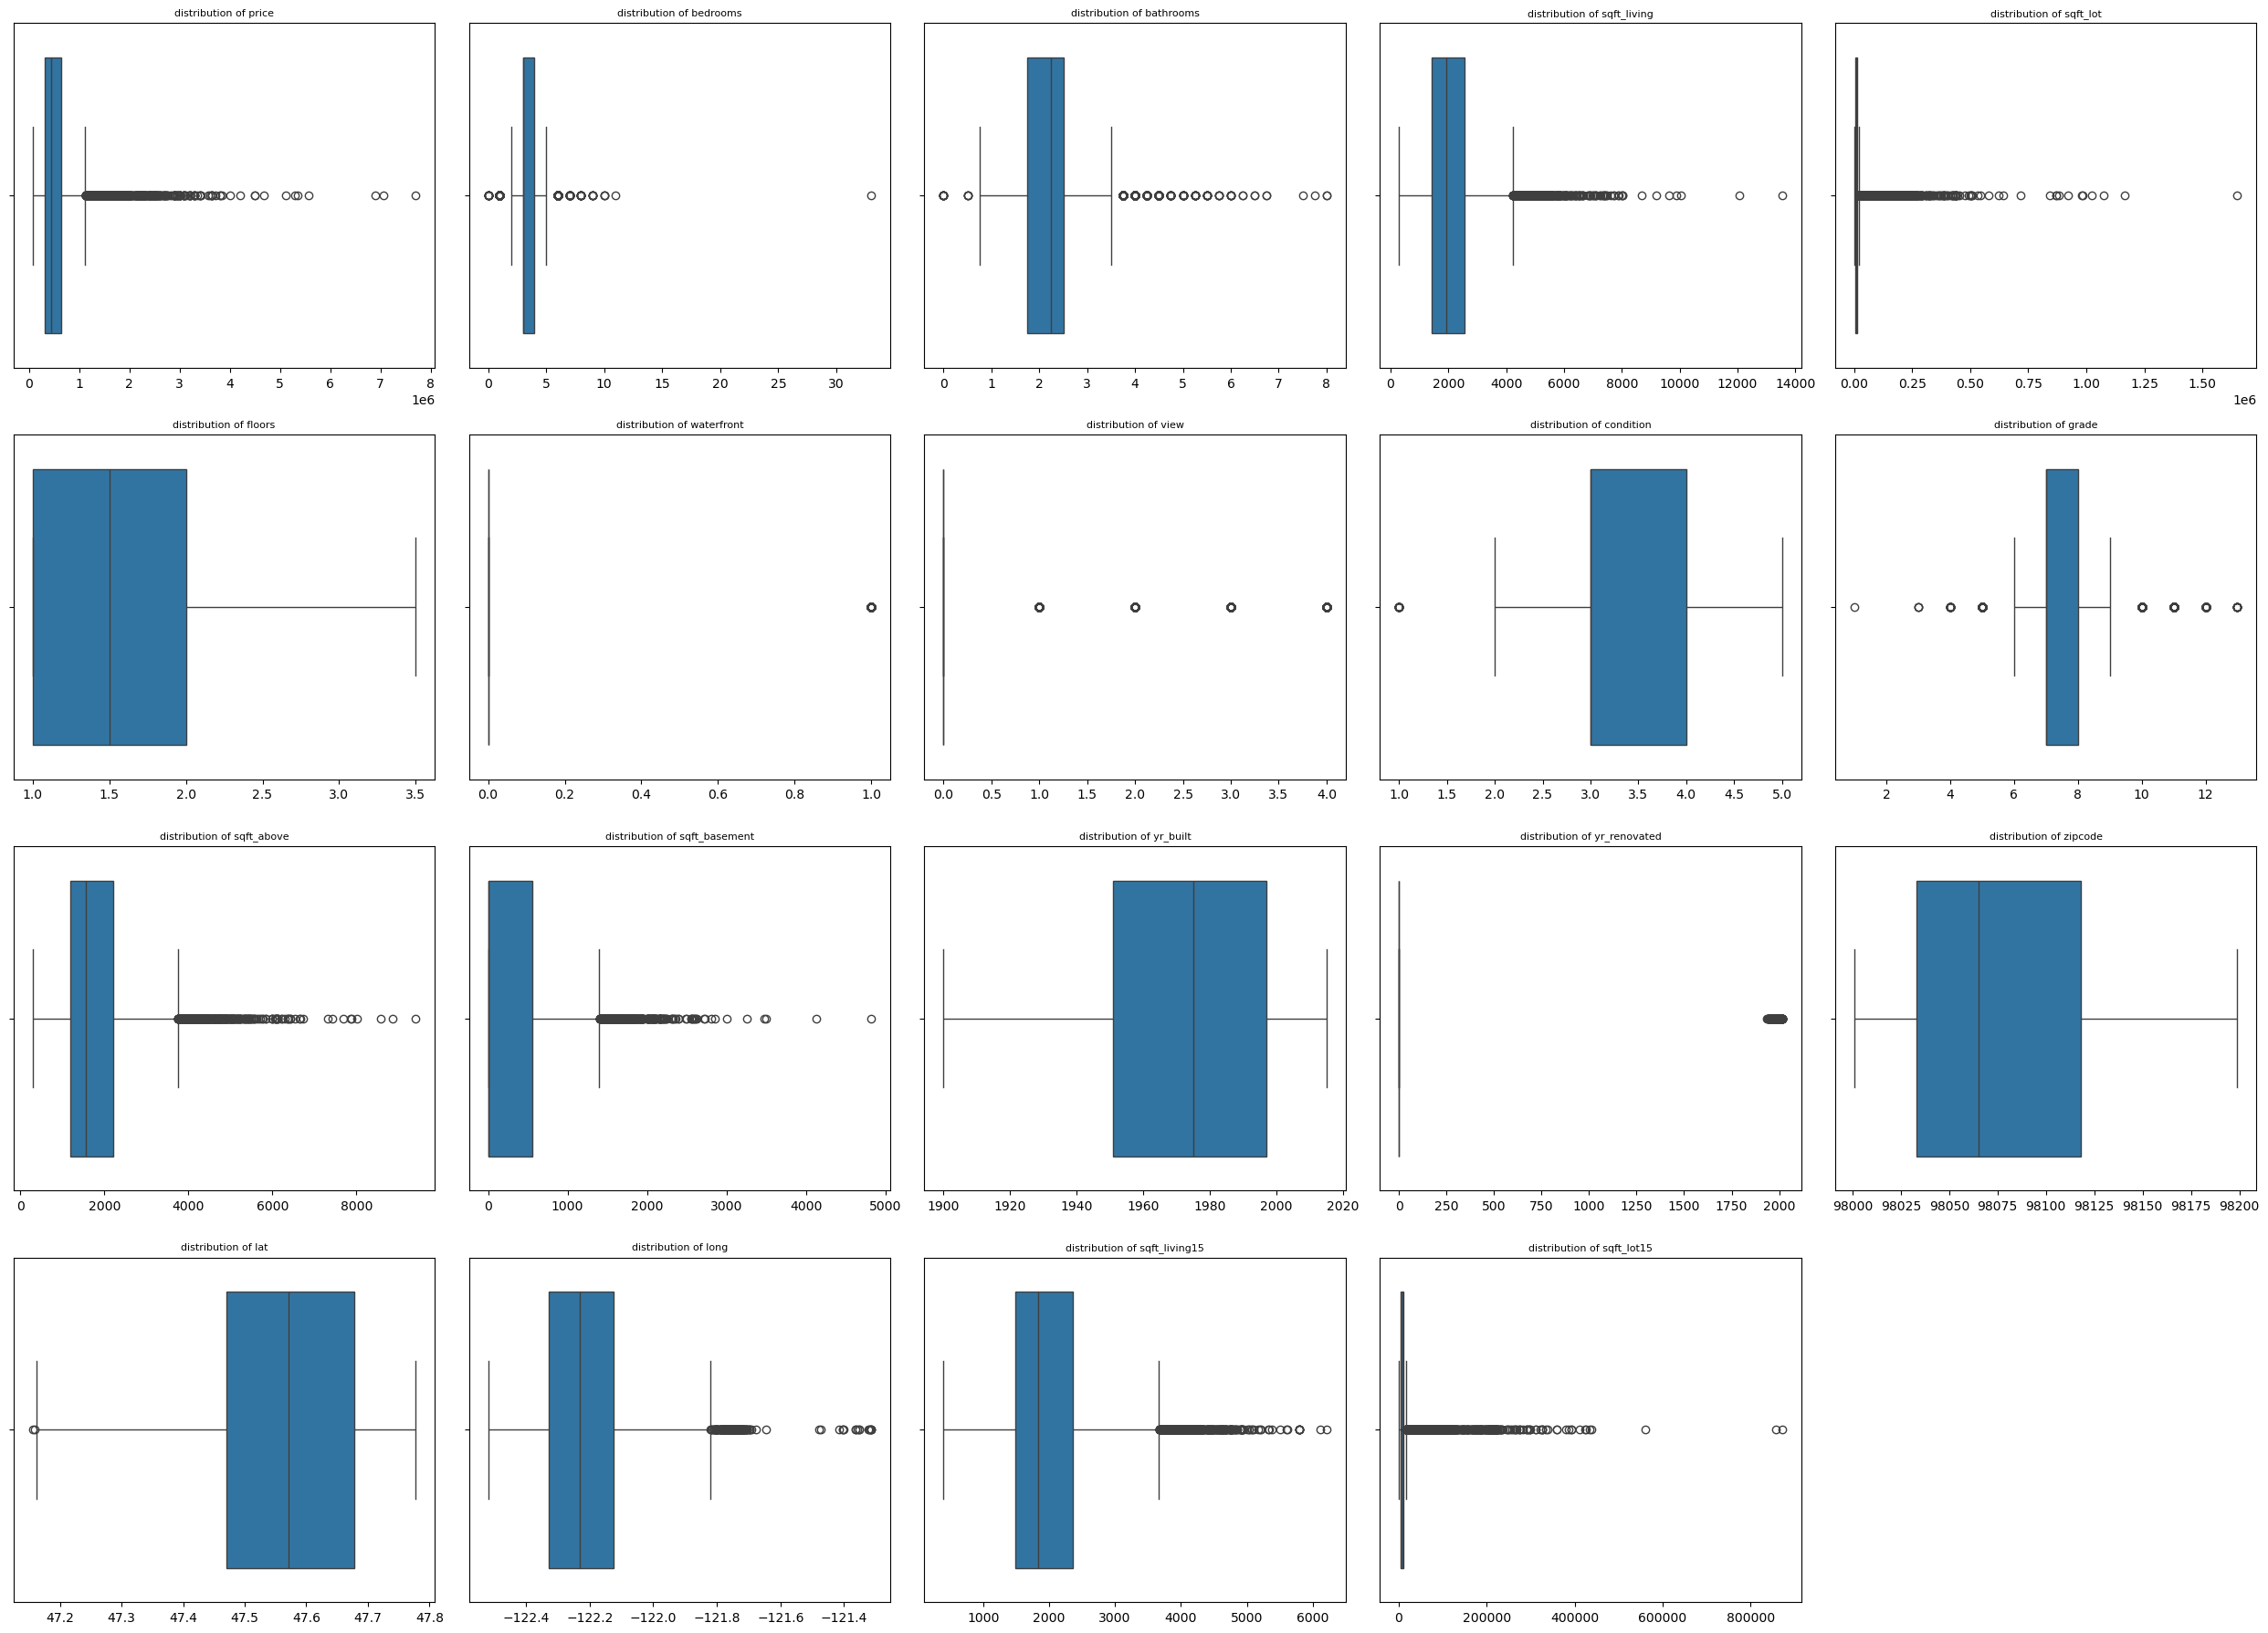

In [5]:
#Visualizing Outliers in our Dataset
#calculating grid size
variables = [col for col in df.columns]

num_variables = len(variables)
cols = 5 
rows = (num_variables + cols -1) // cols

fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize = (5* cols, 4.5 * rows))
axes = axes.flatten()

for i, col in enumerate(variables):
    sns.boxplot(x= df[col], ax=axes[i])
    axes[i].set_title(f"distribution of {col}", fontsize = 8)
    axes[i].set_xlabel("")

for j in range (i + 1, len(axes)):
    fig.delaxes(axes[j])
fig.tight_layout()
plt.show()

In [6]:
# log transformation for price 
df['price'] = np.log1p(df['price'])

In [7]:
#handling outliers
from scipy.stats.mstats import winsorize
for col in ["bedrooms", "sqft_living", "sqft_lot", "sqft_above","sqft_basement","sqft_lot15"]:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])

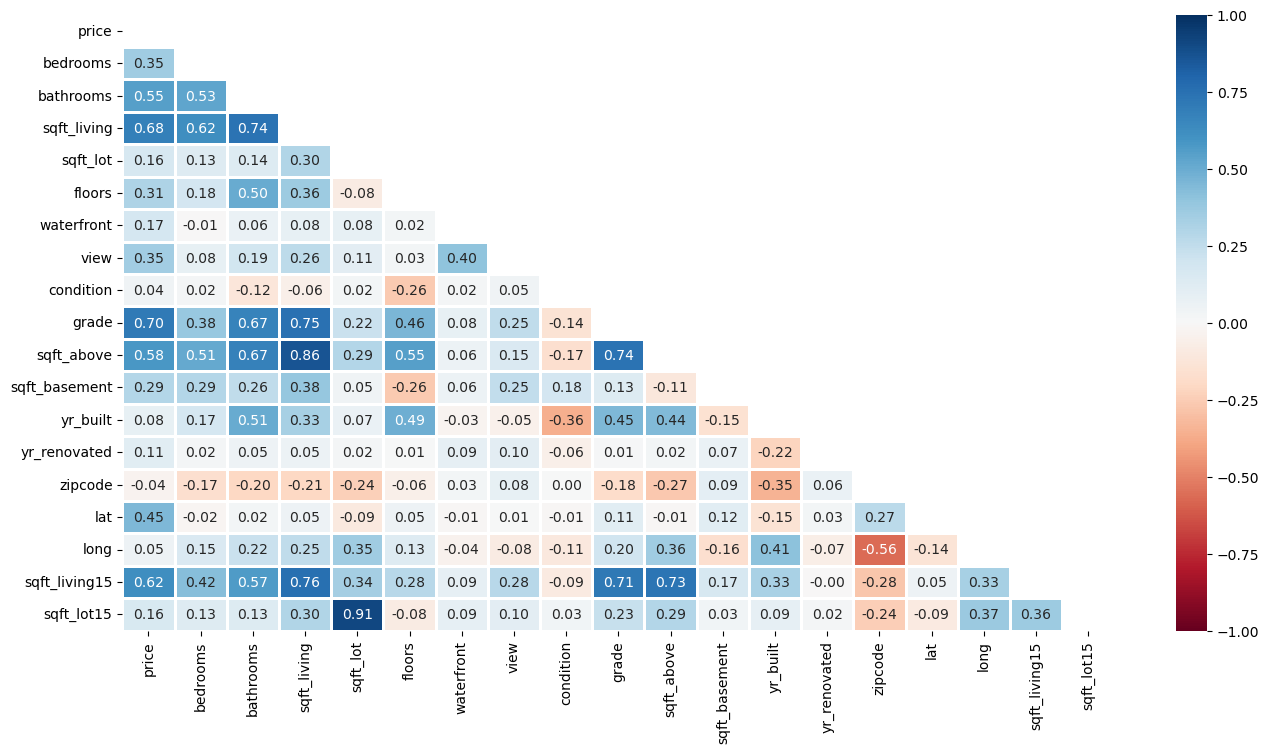

In [8]:
# Correlation of numeric values
import seaborn as sns
numeric_df = df.select_dtypes(include = 'number')
plt.figure(figsize =(16, 8))
mask = np.triu(np.ones_like(numeric_df.corr(), dtype=bool))
sns.heatmap(numeric_df.corr(), mask = mask, center=0, cmap="RdBu", linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

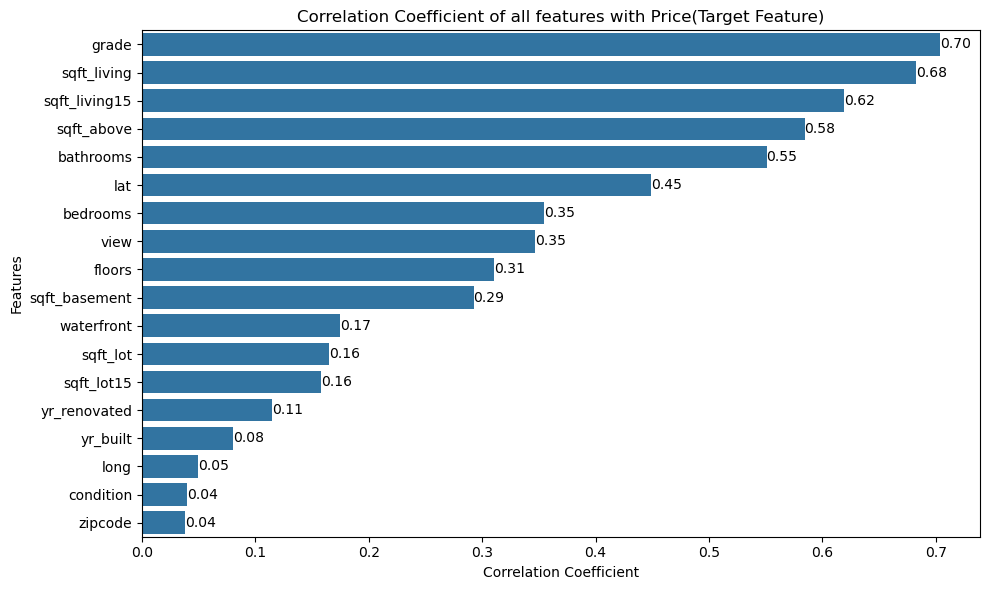

In [9]:
# Visualising correlation with Price
corr = numeric_df.corr()['price'].drop('price')
corr_sort = corr.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_sort.values, y=corr_sort.index)
for index, values in enumerate(corr_sort):
    plt.text(values, index, f"{values:.2f}", va='center')

plt.title("Correlation Coefficient of all features with Price(Target Feature)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [10]:
# dropped some columns with no relationship and to reduce multicolinearity
df = df.drop(['zipcode', 'sqft_lot15', 'sqft_living15', 'sqft_above'], axis=1)

#### Standardization
##### Our dataset was measured in dfferent scales, such as count, square footage. To ensure interpretability of model. I will standardize the input variables.<br>
This will also help model performance.
For the Machine learning, Model will be built with single feature first before more features are added

Coefficients:  [0.35761255]
Intercept:  13.043618170596018
Mean Squared error: 0.15
Coefficient of determination: 0.48


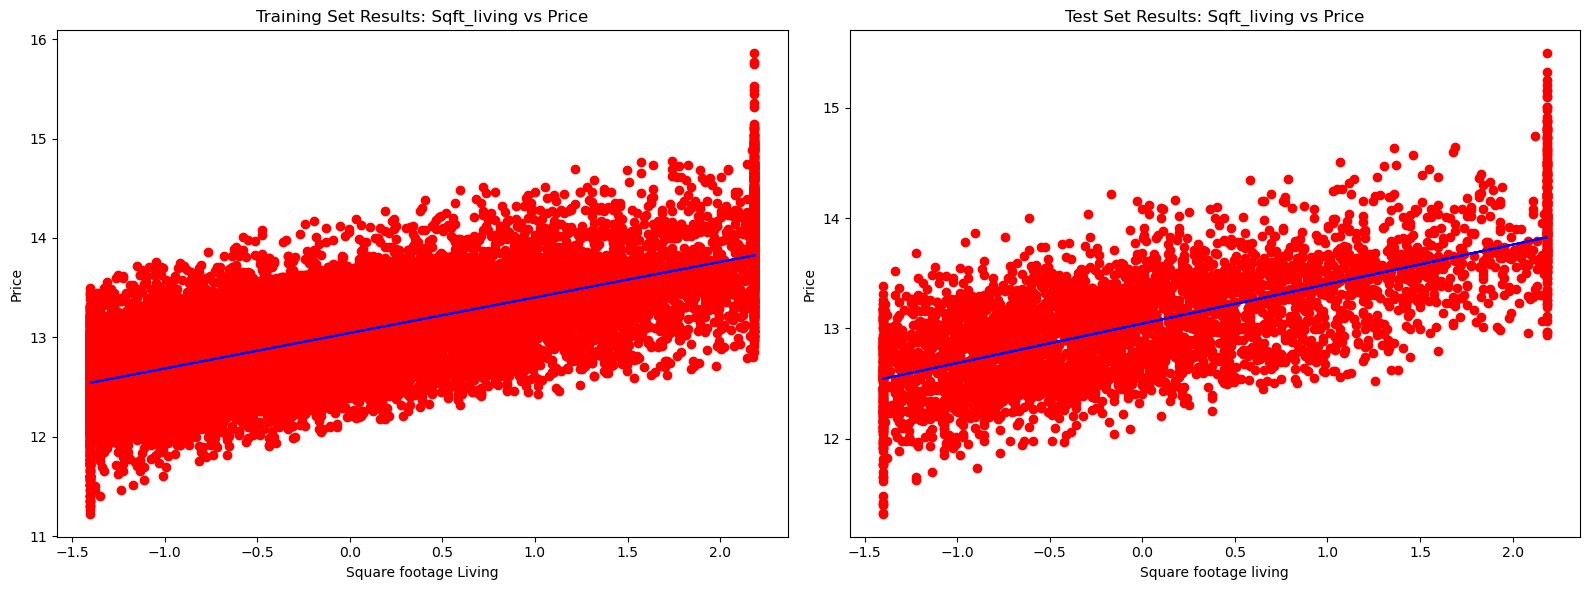

In [12]:
# Training with one feature == Square footage living 
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, [3]].values
y = df.iloc[:, 0].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # to avoid data leakage

model = LinearRegression()
model.fit(X_train, y_train)

print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)
print('Mean Squared error: %.2f'
      % mean_squared_error(y_test, model.predict(X_test)))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, model.predict(X_test)))


fig = plt.figure(figsize = (16, 6))

# Visualising test training set results
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(X_train, y_train, color ='red')
ax1.plot(X_train, model.predict(X_train), color = 'blue')
ax1.set_xlabel('Square footage Living')
ax1.set_ylabel('Price')
plt.title('Training Set Results: Sqft_living vs Price');

# Visualising test results
ax2 = plt.subplot(1, 2, 2)
ax2.scatter(X_test, y_test, color='red')
ax2.plot(X_test, model.predict(X_test), color ='blue')
ax2.set_xlabel('Square footage living')
ax2.set_ylabel('Price')
plt.title('Test Set Results: Sqft_living vs Price');

plt.tight_layout()
plt.show()

Coefficients:  [0.00023499 0.19878372]
Intercept:  11.043212328545163
Mean Squared error: 0.12
Coefficient of determination: 0.56


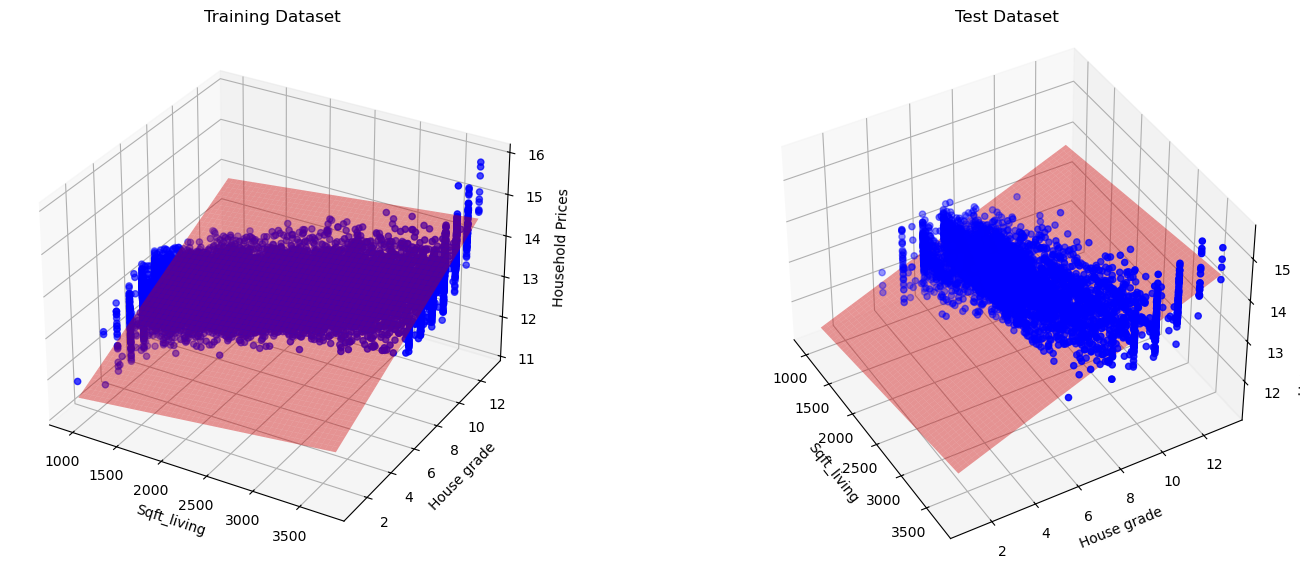

In [13]:
# Feature selection using 2 highly correlated values{sqftliving and grade}
#standardization was removed for better visualization
X= df.iloc[:, [3, 9]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)

print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)
print('Mean Squared error: %.2f'
      % mean_squared_error(y_test, model.predict(X_test)))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, model.predict(X_test)))

# Creating meshgrid based on actal feature ranges
sqft_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
grade_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
S, G = np.meshgrid(sqft_range, grade_range)

#predict prices over the grid
Z = model.coef_[0] * S + model.coef_[1] * G + model.intercept_

# Visualising both training and test data set:
fig = plt.figure(figsize=(16, 6))

#subplot 1: Training data
ax1 = fig.add_subplot(1, 2, 1, projection ='3d')
ax1.scatter(X_train[:,0], X_train[:,1], y_train, color ='blue')
ax1.plot_surface(S, G, Z, alpha=0.4, color='red')
ax2.azim = -30
ax2.dist = -10
ax2.elev = 40
ax1.set_title('Training Dataset')
ax1.set_xlabel('Sqft_living')
ax1.set_ylabel('House grade')
ax1.set_zlabel('Household Prices')

# Visualise test data set results:
ax2 = fig.add_subplot(1, 2, 2, projection ='3d')
ax2.scatter(X_test[:,0], X_test[:,1], y_test, color ='blue')
ax2.plot_surface(S, G, Z, alpha=0.4, color='red')
ax2.azim = -30
ax2.dist = -10
ax2.elev = 40
ax2.set_title('Test Dataset')
ax2.set_xlabel('Sqft_living')
ax2.set_ylabel('House grade')
ax2.set_zlabel('Household Prices')

fig.tight_layout(pad=2.0)
plt.show()

##### Training with multiple features

In [14]:
# Bathroom, bathroom, living, lot, floors, waterfront
X= df.iloc[:, [1,2,3,4,5,6]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)

print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)
print('Mean Squared error: %.2f'
      % mean_squared_error(y_test, model.predict(X_test)))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, model.predict(X_test)))

Coefficients:  [-7.01101069e-02  6.29191624e-02  4.48066468e-04 -2.30424614e-06
  3.58248000e-02  7.05057428e-01]
Intercept:  12.196596466386998
Mean Squared error: 0.14
Coefficient of determination: 0.51


In [15]:
# Bathroom, bathroom, living, lot, floors, waterfront, view, condition, grade, basement
X= df.iloc[:, [1,2,3,4,5,6,7,8,9,10]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)

print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)
print('Mean Squared error: %.2f'
      % mean_squared_error(y_test, model.predict(X_test)))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, model.predict(X_test)))

Coefficients:  [-2.93252926e-02 -4.80582088e-03  2.09677053e-04 -2.27823022e-06
  4.63846226e-02  3.86740541e-01  7.39641283e-02  9.37997953e-02
  2.03931746e-01  1.13379671e-04]
Intercept:  10.748390496481314
Mean Squared error: 0.11
Coefficient of determination: 0.61


In [16]:
#Bathroom, bathroom, living, lot, floors, waterfront, view, 
#condition, grade, basement, yr built, renovated, lat, long
X= df.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42)

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test) # to avoid data leakage

model.fit(X_train, y_train)

print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)
print('Mean Squared error: %.2f'
      % mean_squared_error(y_test, model.predict(X_test)))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, model.predict(X_test)))

# Note: Scalling our data or not doesn't improve the r2 score

Coefficients:  [-2.04424247e-02  7.68766541e-02  2.11599666e-04 -2.84617386e-07
  5.05644112e-02  3.85467098e-01  6.86666592e-02  6.25860763e-02
  1.84719115e-01 -7.27346520e-06 -3.59673935e-03  2.74920390e-05
  1.34647977e+00  5.37008451e-02]
Intercept:  -39.58745273114766
Mean Squared error: 0.07
Coefficient of determination: 0.76


##### Feature with negative coefficients with target. will be dropped and focus on features with positive coefficients

In [17]:
#Training with positive coefficients features
# bathrooms, floors, waterfront, view, condition, grade, lat, longitude 
X= df.iloc[:, [2,5,6,7,8,9,13,14]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42)

model2 = LinearRegression()

model2.fit(X_train, y_train)

print('Coefficients: ', model2.coef_)
print('Intercept: ', model2.intercept_)
print('Mean Squared error: %.2f'
      % mean_squared_error(y_test, model2.predict(X_test)))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, model2.predict(X_test)))

Coefficients:  [ 0.13046074 -0.00926127  0.38971005  0.09975905  0.10735246  0.232584
  1.46321866 -0.04168243]
Intercept:  -64.07435890813765
Mean Squared error: 0.08
Coefficient of determination: 0.71


In [18]:
#final training with positive coefficients using 100 runs 
# bathrooms, waterfront, view, condition, grade, lat
X= df.iloc[:, [2,6,7,8,9,13]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = i)

lin_model = LinearRegression()

n_runs = 100 
r2_scores = []

# Training with Linear Regression
for i in range (n_runs):
    
    lin_model.fit(X_train, y_train)
    r2 = lin_model.score(X_test, y_test)
    r2_scores.append(r2)

avg_accuracy = np.mean(r2_scores)
print('Average accuracy after %d runs: %.2f' %(n_runs, avg_accuracy))
print('Coefficients: ', lin_model.coef_)
print('Intercept: ', lin_model.intercept_)
print('Mean Squared error: %.2f'
      % mean_squared_error(y_test, lin_model.predict(X_test)))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, lin_model.predict(X_test)))

Average accuracy after 100 runs: 0.69
Coefficients:  [0.12544752 0.37669593 0.10329378 0.1079543  0.23004356 1.47171654]
Intercept:  -59.36918113445624
Mean Squared error: 0.09
Coefficient of determination: 0.69


In [24]:
coefficients = [0.12544752, 0.37669593, 0.10329378, 0.1079543, 0.23004356, 1.47171654]
features = ['bathrooms', 'waterfront', 'view', 'condition', 'grade', 'lat']

pct_change = (np.exp(coefficients) - 1) * 100

coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients,
    'Approx_%_Change': pct_change
}).sort_values(by='Approx_%_Change', ascending=False)

coef_df['Approx_%_Change'] = coef_df['Approx_%_Change'].apply(
    lambda x: f"+{x:.1f}%" if x > 0 else f"{x:.1f}%"
)

# Step 5: Sort by effect strength (largest positive first)
coef_df = coef_df.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)

# Step 6: Display results
print(coef_df.to_string(index=False))

   Feature  Coefficient Approx_%_Change
       lat     1.471717         +335.7%
waterfront     0.376696          +45.7%
     grade     0.230044          +25.9%
 bathrooms     0.125448          +13.4%
 condition     0.107954          +11.4%
      view     0.103294          +10.9%


##### Final model offers a more insightful analysis as it focuses on the strongest predictors of our target variables

##### Location has the largest impact on price, and our model predicts a 335% increase in price for houses located in certain zones. Homes with waterfront are about 45% more expensive than those without this feature. An increase in house grade also leads to a 26% increase in house price. An additional bathroom in the house leads to about a 13% increase in price, the house condition increases price by about 11% while the view also increases price by about 11%. 